
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/ADS523_TS/blob/main/W9/W9_2.ipynb)





In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
data_ = pd.read_csv("electricity_cons.csv") #### we will use the windspeed

In [18]:
data = data_.iloc[:, -1]

In [19]:
data = (data - data.mean())/data.std()

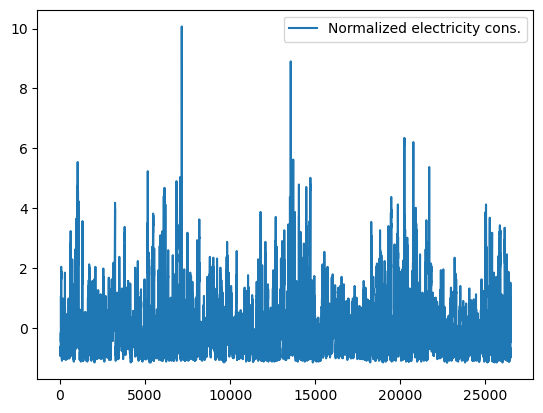

In [21]:
plt.plot(data, label = "Normalized electricity cons.")   #### you see there is not explicit trend, nor unit root.
plt.legend()
plt.show()

In [22]:
def splitter(data, alpha = 0.8):  ### We split the data into 0.8 and 0.2  train test splitting we do not do validation.
  N = len(data)
  N_ = int(alpha*N)
  data_train = data[:N_]
  data_test = data[N_:]
  return data_train, data_test

In [23]:
data_train, data_test = splitter(data)

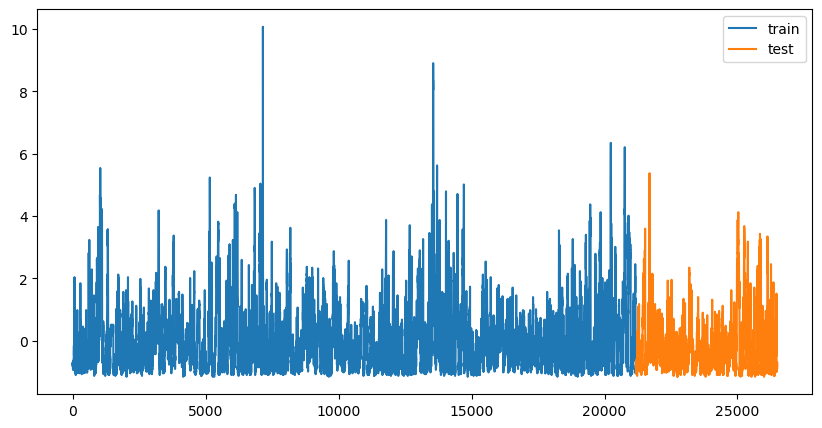

In [24]:
plt.figure(figsize= (10,5))
plt.plot(data_train, label ="train")
plt.plot(data_test, label = "test")
plt.legend()
plt.show()

In [25]:
def sliding_window(data:list, window_size:int = 100):
  data = np.array(data)
  X = []
  y = []
  i = 0
  while True:
    try:
      y.append(data[i+window_size])
      X.append(data[i:i+window_size])
      i += 1
    except Exception:
      print(f"We have reached the end of the list! There are total number of {i} rows in your data")
      break
  return np.array(X), np.array(y)

In [26]:
(X_train, y_train), (X_test, y_test) = sliding_window(data_train), sliding_window(data_test)

We have reached the end of the list! There are total number of 21096 rows in your data
We have reached the end of the list! There are total number of 5200 rows in your data


###Start with KNN

In [27]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_jobs = -1, n_neighbors = 3)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))   #### this gives R2 score, no need to import sklearn's r2score.
y_pred = knn.predict(X_test)


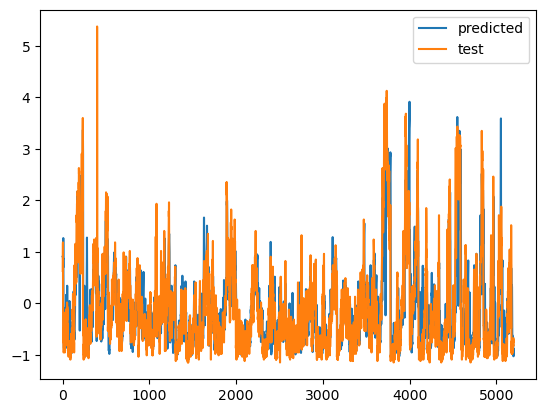

In [28]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "test")
plt.legend()
plt.show()

###Decision Tree

In [29]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
score = dt.score(X_test, y_test)
print(score)   #### this give R2 score, no need to import slearn r2score.
y_pred = dt.predict(X_test)

0.8071705094575967


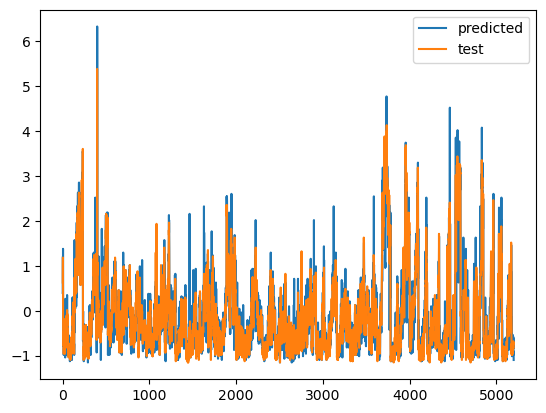

In [30]:
plt.plot(y_pred, label = "predicted")
plt.plot(y_test, label = "test")
plt.legend()
plt.show()

## Time for neural networks

In [ ]:
from sklearn.neural_network import MLPRegressor
ml = MLPRegressor(hidden_layer_sizes = (50,25))
ml.fit(X_train, y_train)
score = ml.score(X_test, y_test)
print(score)   #### this gives R2 score, no need to import sklearn r2score.
y_pred = ml.predict(X_test)

In [ ]:
plt.plot(y_pred[:100], label = "predicted")
plt.plot(y_test[:100], label = "predicted")
plt.legend()
plt.show()

###See what np.roll does to an array np.roll(A, shift)

#Let's do a long term forecast and see what happens?

In [ ]:
def function(regressor, data:np.array, length = 10):
  temp = np.copy(data)
  res = []
  for i in range(length):
    L = regressor.predict(np.expand_dims(temp, 0))
    temp = np.roll(temp, -1)
    temp[-1]=  L[0]
    res.append(temp[-1])
  return np.array(res)

In [ ]:
data_forecast = function(ml, X_test[0], 300)  #### length 25 forecast we did.

In [ ]:
plt.plot(data_forecast, label= "Longterm - forecast")
plt.plot(np.array(y_test)[:350], label = "Test set")
plt.title("50 unit forecast")
plt.legend()
plt.show()

##You see, long term forecast is not as easy as short term forecast.

## Let's do some hyper parameter tuning to see if are goind to well!!!

In [14]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

In [31]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [36]:
knn_param = {"n_neighbors":[3,6], "p":np.arange(2, 10,1), "weights":["uniform", "uniform"]}
ts = TimeSeriesSplit(n_splits=5)
g = GridSearchCV(knn, param_grid = knn_param, n_jobs = -1, cv = ts)
g.fit(X_train, y_train)
## This will take some time!!!!